In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import sklearn.datasets as sk_data
import NeuralNetworks as Neural
from importlib import reload
reload(Neural)
import ActivationFunctions as Activation
reload(Activation)

rng = np.random.default_rng()

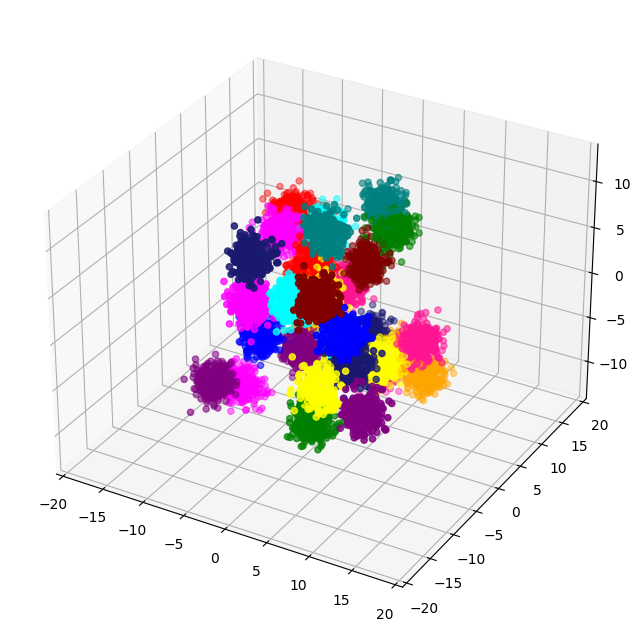

In [21]:
test_data_size = 10000
cluster_count = 32
feature_count = 64  

test_data = (sk_data.make_blobs(test_data_size, feature_count, centers=cluster_count))
plot_test_data = test_data[0].T

x = plot_test_data[0]
y = plot_test_data[1]
z = plot_test_data[2]
label = test_data[1]
color_map = ['red','yellow','green','cyan','blue','magenta','purple','teal','orange','maroon','deeppink','midnightblue']

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.scatter(x, y, z, c=label, cmap=colors.ListedColormap(color_map))

plt.show()


In [22]:
int_labels = test_data[1]

one_hot_labels = np.zeros((len(int_labels), cluster_count))
one_hot_labels[np.arange(len(int_labels)), int_labels] = 1

In [23]:
nn_input = []   
for data_point in range(test_data_size):
    inp_data = list((test_data[0][data_point],one_hot_labels[data_point]))
    nn_input.append(inp_data)

In [24]:
train_ratio = 0.5
input_split_index = int(len(nn_input) * train_ratio)
nn_train_input = nn_input[:input_split_index]
nn_test_input = nn_input[input_split_index:]

In [25]:
nn_size = [feature_count,16,16,cluster_count]
init_wb = Neural.generate_weights_and_biases(nn_size)

nn = Neural.NeuralNetwork(nn_size, init_wb, 3)

In [26]:
nn_train = nn.train_nn(nn_train_input,nn_test_input,1,100, 0.05)

Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Epoch 56 complete
E

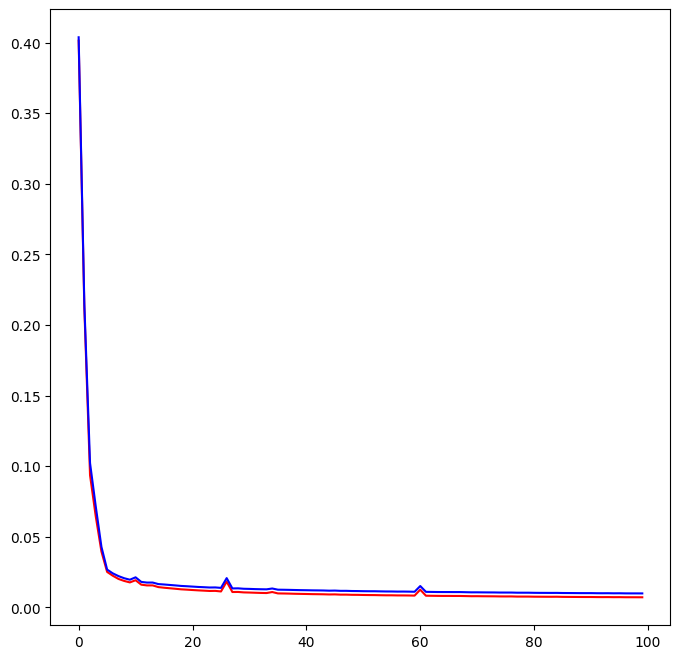

In [27]:
fig = plt.figure(figsize=(8,8))
plt.plot(nn_train[0], color='red')
plt.plot(nn_train[1], color='blue')
plt.show()

In [28]:
#resolution = 300
#x_guesses = np.linspace(-20,20,resolution)
#y_guesses = np.linspace(-20,20,resolution)
#x_y_results = np.zeros((resolution,resolution,3))
#for x in range(resolution):
#    for y in range(resolution):
#        result = nn.calc_nn(np.array((x_guesses[y], y_guesses[x])))
#        x_y_results[x,y] = Activation.softmax(result)
#    print("Line {0} complete".format(x+1))

In [29]:
#fig, ax = plt.subplots(figsize=(8,8),layout='constrained')
#ax.set_xlim(-20,20)
#ax.set_ylim(-20,20)
#ax.imshow(x_y_results, extent=(-20,20,-20,20), origin='lower')
#
#x = plot_test_data[0]
#y = plot_test_data[1]
#label = test_data[1]
#color_map = ['red','green', 'blue']
#ax.scatter(x, y, c=label, cmap=colors.ListedColormap(color_map))
#
#print(nn.calc_nn([ -5, -5]))